In [2]:
import pandas as pd
import matplotlib.pyplot as plt 
%matplotlib inline
df=pd.read_csv('C://Users//SUNNY//Desktop//HR_comma_sep.csv')
df.head(10)

In C:\Users\SUNNY\Anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: 
The text.latex.unicode rcparam was deprecated in Matplotlib 3.0 and will be removed in 3.2.
In C:\Users\SUNNY\Anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: 
The savefig.frameon rcparam was deprecated in Matplotlib 3.1 and will be removed in 3.3.
In C:\Users\SUNNY\Anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: 
The pgf.debug rcparam was deprecated in Matplotlib 3.0 and will be removed in 3.2.
In C:\Users\SUNNY\Anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: 
The verbose.level rcparam was deprecated in Matplotlib 3.1 and will be removed in 3.3.
In C:\Users\SUNNY\Anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: 
The verbose.fileo rcparam was deprecated in Matplotlib 3.1 and will be removed in 3.3.


,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low
5,0.41,0.50,2,153,3,0,1,0,sales,low
6,0.10,0.77,6,247,4,0,1,0,sales,low
7,0.92,0.85,5,259,5,0,1,0,sales,low
8,0.89,1.00,5,224,5,0,1,0,sales,low
9,0.42,0.53,2,142,3,0,1,0,sales,low


In [65]:
df.shape

(14999, 10)

In [3]:
left = df[df.left==1]
left.shape

(3571, 10)

In [4]:
retained = df[df.left==0]
retained.shape

(11428, 10)

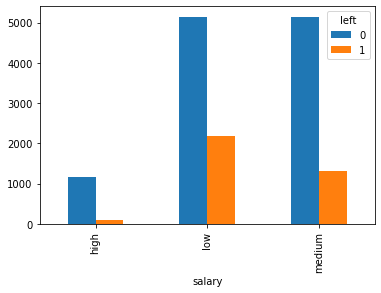

In [5]:
pd.crosstab(df.salary,df.left).plot(kind='bar')

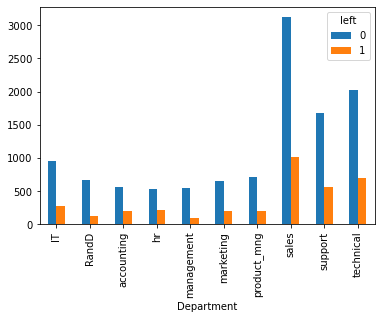

In [6]:
pd.crosstab(df.Department,df.left).plot(kind='bar')

In [105]:
sale_count = df[(df.left==1)].agg('count')
sale_count

satisfaction_level       319
last_evaluation          319
number_project           319
average_montly_hours     319
time_spend_company       319
Work_accident            319
left                     319
promotion_last_5years    319
Department               319
salary                   319
dtype: int64

In [100]:
sale_count = df[(df.Department=='technical')].agg('count')
sale_count

satisfaction_level       2720
last_evaluation          2720
number_project           2720
average_montly_hours     2720
time_spend_company       2720
Work_accident            2720
left                     2720
promotion_last_5years    2720
Department               2720
salary                   2720
dtype: int64

In [107]:
sale_count = df[(df.time_spend_company<6) & (df.promotion_last_5years>0)].agg('count')
sale_count

satisfaction_level       240
last_evaluation          240
number_project           240
average_montly_hours     240
time_spend_company       240
Work_accident            240
left                     240
promotion_last_5years    240
Department               240
salary                   240
dtype: int64

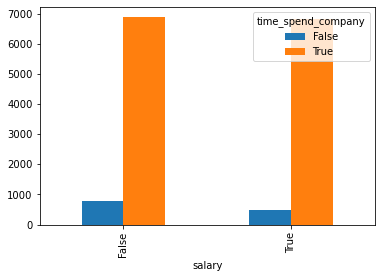

In [111]:
pd.crosstab(df.salary=='low',df.time_spend_company<6).plot(kind='bar')

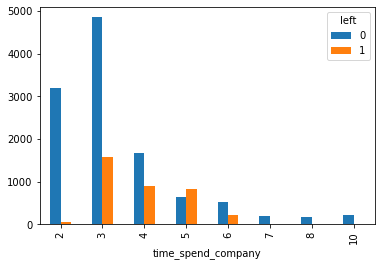

In [49]:
pd.crosstab(df.time_spend_company,df.left).plot(kind='bar')

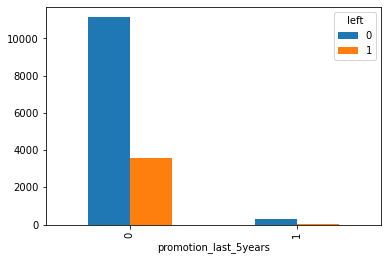

In [91]:
pd.crosstab(df.promotion_last_5years,df.left).plot(kind='bar')

In [7]:
new_data=df.groupby('left').mean()
new_data

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years
left,,,,,,,
0,0.666810,0.715473,3.786664,199.060203,3.380032,0.175009,0.026251
1,0.440098,0.718113,3.855503,207.419210,3.876505,0.047326,0.005321


In [9]:
subdf = df[['satisfaction_level','average_montly_hours','promotion_last_5years','time_spend_company','salary']]
subdf.head()

,satisfaction_level,average_montly_hours,promotion_last_5years,time_spend_company,salary
0,0.38,157,0,3,low
1,0.80,262,0,6,medium
2,0.11,272,0,4,medium
3,0.72,223,0,5,low
4,0.37,159,0,3,low


In [10]:
salary_dummies = pd.get_dummies(subdf.salary, prefix="salary")
df_with_dummies = pd.concat([subdf,salary_dummies],axis='columns')
df_with_dummies.head()

,satisfaction_level,average_montly_hours,promotion_last_5years,time_spend_company,salary,salary_high,salary_low,salary_medium
0,0.38,157,0,3,low,0,1,0
1,0.80,262,0,6,medium,0,0,1
2,0.11,272,0,4,medium,0,0,1
3,0.72,223,0,5,low,0,1,0
4,0.37,159,0,3,low,0,1,0


In [11]:
df_with_dummies.drop('salary',axis='columns',inplace=True)
df_with_dummies.head()

,satisfaction_level,average_montly_hours,promotion_last_5years,time_spend_company,salary_high,salary_low,salary_medium
0,0.38,157,0,3,0,1,0
1,0.80,262,0,6,0,0,1
2,0.11,272,0,4,0,0,1
3,0.72,223,0,5,0,1,0
4,0.37,159,0,3,0,1,0


In [12]:
X = df_with_dummies
X.head()

,satisfaction_level,average_montly_hours,promotion_last_5years,time_spend_company,salary_high,salary_low,salary_medium
0,0.38,157,0,3,0,1,0
1,0.80,262,0,6,0,0,1
2,0.11,272,0,4,0,0,1
3,0.72,223,0,5,0,1,0
4,0.37,159,0,3,0,1,0


In [13]:
y = df.left

In [44]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,train_size=0.3)

C:\Users\SUNNY\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2026: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)


In [45]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()

In [46]:
model.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [47]:
model.predict(X_test)

array([0, 0, 0, ..., 0, 0, 1], dtype=int64)

In [48]:
model.score(X_test,y_test)

0.7681904761904762